# Handle Categorical Features
## One Hot Encoding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df.dropna(inplace=True)

In [ ]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1



#### Onehotencoding with many categories in a feature

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/mercedesbenz.csv',usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [ ]:
for i in df.columns:
 print(len(df[i].unique()))

47
27
44
7
4
29
12


In [ ]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [ ]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [ ]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [ ]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [ ]:
lst_10.append('X1')

In [ ]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


## Ordinal Number Encoding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import datetime

In [ ]:
today_date=datetime.datetime.today()

In [ ]:
today_date

datetime.datetime(2021, 3, 3, 4, 38, 0, 634147)

In [ ]:
today_date-datetime.timedelta(2)

datetime.datetime(2021, 3, 1, 4, 38, 0, 634147)

In [ ]:
days=[today_date-datetime.timedelta(x) for x in range(15)]

In [ ]:
data = pd.DataFrame(days)
data.columns=['Day']

In [ ]:
data.head()

,Day
0,2021-03-03 04:38:00.634147
1,2021-03-02 04:38:00.634147
2,2021-03-01 04:38:00.634147
3,2021-02-28 04:38:00.634147
4,2021-02-27 04:38:00.634147


In [ ]:
data['Day'].dt.day_name()

0     Wednesday
1       Tuesday
2        Monday
3        Sunday
4      Saturday
5        Friday
6      Thursday
7     Wednesday
8       Tuesday
9        Monday
10       Sunday
11     Saturday
12       Friday
13     Thursday
14    Wednesday
Name: Day, dtype: object

In [ ]:
data['weekday']=data['Day'].dt.day_name()

In [ ]:
data.head()

,Day,weekday
0,2021-03-03 04:38:00.634147,Wednesday
1,2021-03-02 04:38:00.634147,Tuesday
2,2021-03-01 04:38:00.634147,Monday
3,2021-02-28 04:38:00.634147,Sunday
4,2021-02-27 04:38:00.634147,Saturday


In [ ]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [ ]:
dictionary

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [ ]:
data['weekday'].map(dictionary)

0     3
1     2
2     1
3     7
4     6
5     5
6     4
7     3
8     2
9     1
10    7
11    6
12    5
13    4
14    3
Name: weekday, dtype: int64

In [ ]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [ ]:
data

,Day,weekday,weekday_ordinal
0,2021-03-03 04:38:00.634147,Wednesday,3
1,2021-03-02 04:38:00.634147,Tuesday,2
2,2021-03-01 04:38:00.634147,Monday,1
3,2021-02-28 04:38:00.634147,Sunday,7
4,2021-02-27 04:38:00.634147,Saturday,6
5,2021-02-26 04:38:00.634147,Friday,5
6,2021-02-25 04:38:00.634147,Thursday,4
7,2021-02-24 04:38:00.634147,Wednesday,3
8,2021-02-23 04:38:00.634147,Tuesday,2
9,2021-02-22 04:38:00.634147,Monday,1


## Count Or Frequency Encoding

In [ ]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
columns=[1,3,5,6,7,8,9,13]

In [ ]:
train_set[columns]

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [ ]:
train_set=train_set[columns]

In [ ]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [ ]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [ ]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
train_set['Country'].value_counts().to_dict()

{' ?': 583,
 ' Cambodia': 19,
 ' Canada': 121,
 ' China': 75,
 ' Columbia': 59,
 ' Cuba': 95,
 ' Dominican-Republic': 70,
 ' Ecuador': 28,
 ' El-Salvador': 106,
 ' England': 90,
 ' France': 29,
 ' Germany': 137,
 ' Greece': 29,
 ' Guatemala': 64,
 ' Haiti': 44,
 ' Holand-Netherlands': 1,
 ' Honduras': 13,
 ' Hong': 20,
 ' Hungary': 13,
 ' India': 100,
 ' Iran': 43,
 ' Ireland': 24,
 ' Italy': 73,
 ' Jamaica': 81,
 ' Japan': 62,
 ' Laos': 18,
 ' Mexico': 643,
 ' Nicaragua': 34,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Peru': 31,
 ' Philippines': 198,
 ' Poland': 60,
 ' Portugal': 37,
 ' Puerto-Rico': 114,
 ' Scotland': 12,
 ' South': 80,
 ' Taiwan': 51,
 ' Thailand': 18,
 ' Trinadad&Tobago': 19,
 ' United-States': 29170,
 ' Vietnam': 67,
 ' Yugoslavia': 16}

In [ ]:
country_map=train_set['Country'].value_counts().to_dict()

In [ ]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


### Advantages
1. Easy To Use
2. Not increasing feature space 

### Disadvantages
1. It will provide same weight if the frequencies are same

## Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [ ]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [ ]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean Encoding

In [ ]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [ ]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [ ]:
df['mean_ordinal_encode']=df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


## Probability Ratio Encoding
### Steps:
1. Probability of Survived based on Cabin--- Categorical Feature
2. Probability of Not Survived---1-pr(Survived)
3. pr(Survived)/pr(Not Survived)
4. Dictonary to map cabin with probability
5. replace with the categorical featur

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/titanic_train.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [ ]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [ ]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [ ]:
df['Cabin'].astype(str).str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [ ]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [ ]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [ ]:
prob_df=pd.DataFrame(prob_df)

In [ ]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [ ]:
prob_df['Died']=1-prob_df['Survived']

In [ ]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [ ]:
prob_df['Probability_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [ ]:
probability_encoded=prob_df['Probability_ratio'].to_dict()

In [ ]:
df['Cabin_encoded']=df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


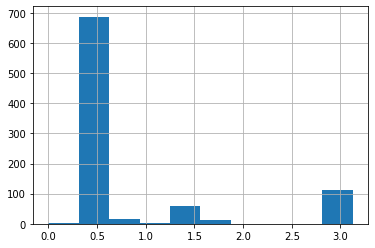

In [ ]:
df['Cabin_encoded'].hist(bins=10)